In [1]:
from moirepy import BilayerMoireLattice, TriangularLayer, SquareLayer 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Make the lattice (Lattice type, a_val, b_val, x_no, y_no, pbc)  #don't put fractional values for x_no and y_no
#lattice = BilayerMoireLattice(TriangularLayer, 1, 11, 11, 1, 2, 2)
lattice = BilayerMoireLattice(SquareLayer, 3, 4, 4, 3,  1, 1)

twist angle = 0.2838 rad (16.2602 deg)
25 points in lower lattice
25 points in upper lattice


In [14]:
theta = 16.2602

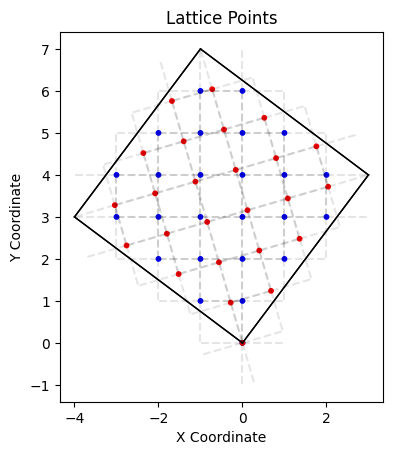

In [5]:
# Plot the lattice with the eigenvectors
lattice.plot_lattice()
# plt.plot(eig

In [6]:
# define t_dd (or hooping in lower and upper layer lattice)
def tuudd(this_coo, neigh_coo, this_type, neigh_type):
    gamma = 0 # anisotropy parameter
    t0 = 1    # hopping parameter
    theta = np.rad2deg(np.arctan2(neigh_coo[1] - this_coo[1], neigh_coo[0] - this_coo[0]))
    # if -5 < theta < 5:            #this if and else conidtion is there to put anisotropy along x-axis (or x' axis)
    #     return t0 - gamma
    # elif theta < -175 or 175 < theta:
    #     return t0 + gamma
    # else:
    return t0

# For gamma = - delta casee, copy the above function and change the value of -gamma 

In [7]:
# Interlayer hopping function
def tul(this_coo, neigh_coo, this_type, neigh_type):
    d = 0.1
    t0 = 1
    alpha = 1.1
    dist = np.linalg.norm(np.array(neigh_coo) - np.array(this_coo))
    return t0/(dist**2 + d**2)**alpha

In [8]:
# make the hamiltonian (tuu, tud, tdu, tdd), tuu --> hooping within upper layer.... 
ham = lattice.generate_hamiltonian(tuudd, tuudd, tul, tul)

In [73]:
# # Extract the lower block
# lower = ham[0:271, 0:271]
# inter1= ham[0:271, 271:271*2]
# upper = ham[271:271*2, 271:271*2]
# inter2 = ham[271:271*2, 0:271]

In [74]:
# H = np.block([[lower, inter1],
#              [inter2, upper]])

In [9]:
#check ham is hermitian
np.allclose(ham, ham.T.conj())

True

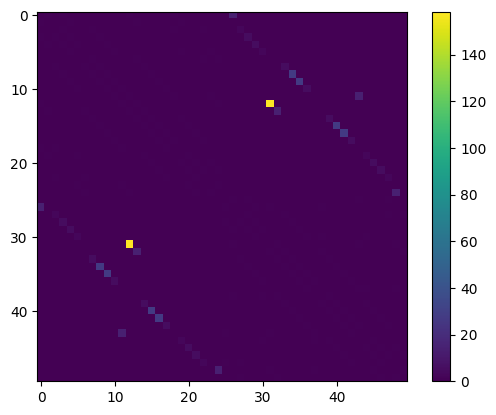

In [10]:
# Show the hamiltonian
plt.imshow(ham)
#show the colorbar
plt.colorbar()

In [77]:
# print the hamiltonian
# print(ham)

In [11]:
# find the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(ham)
j = eigenvalues.real.argsort()
eigenvalues = eigenvalues[j]
eigenvectors = eigenvectors[:, j]

Text(0, 0.5, 'Im(E)')

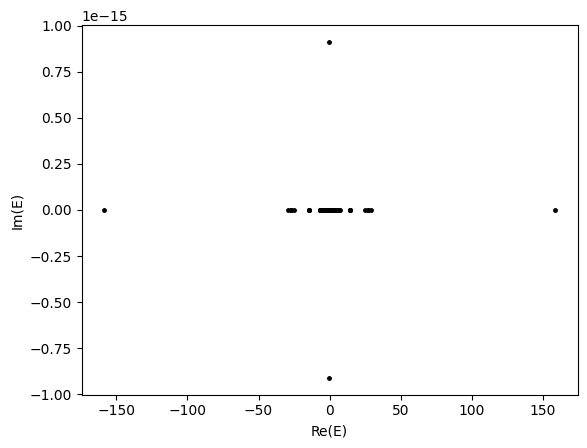

In [12]:
plt.plot(eigenvalues.real, eigenvalues.imag, 'k.', markersize=5)
plt.xlabel('Re(E)') 
plt.ylabel('Im(E)')
# plt.text(0.05, 0.95, f'Angle: {theta}°\nEnergy: {eigenvalues[R].real:.2f}',
#          transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

In [80]:
# Find a suitable energy level to study the skin effect
energy =  2.3 #2.3 #2.3 #0.02 #1 #0 # 2.3 #1.8 #2.55 #(1 + 0j) 
# energy = 0
idx = np.argmin(np.abs(eigenvalues - energy))
print(eigenvalues[idx])
print(idx)

(2.1716877748942163+0j)
115


In [81]:
N = lattice.lower_lattice.points.shape[0]
R =  idx  #np.random.randint(0, 2*N)
R

np.int64(115)

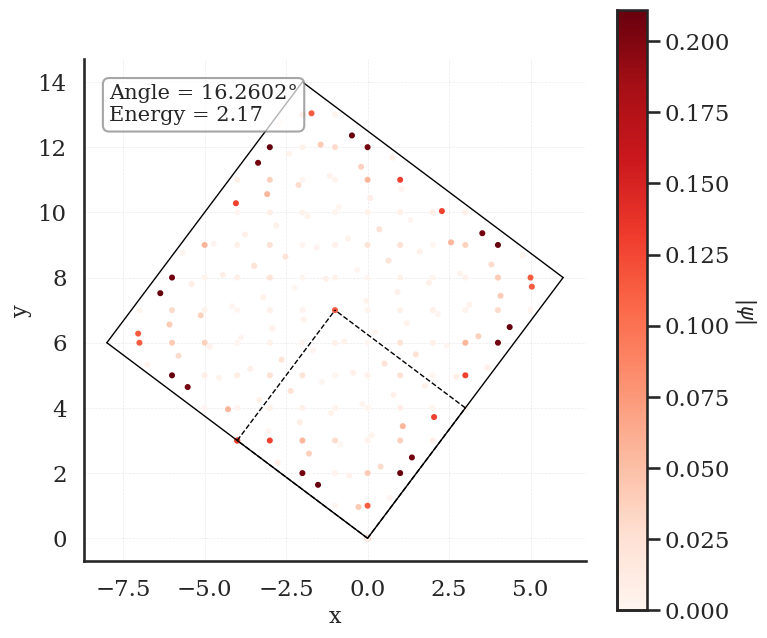

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Use seaborn's white style for a clean background
sns.set_context('talk')
sns.set_style('white')

plt.figure(figsize=(8, 7))

# Disable LaTeX rendering
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'  # Still keeps a nice serif font

nx = lattice.nx
ny = lattice.ny
mlv1 = lattice.mlv1
mlv2 = lattice.mlv2

# Draw large unit cell
plt.plot([0, nx*mlv1[0]], [0, nx*mlv1[1]], 'k', linewidth=1)
plt.plot([0, ny*mlv2[0]], [0, ny*mlv2[1]], 'k', linewidth=1)
plt.plot([nx*mlv1[0], nx*mlv1[0] + ny*mlv2[0]], 
         [nx*mlv1[1], nx*mlv1[1] + ny*mlv2[1]], 'k', linewidth=1)
plt.plot([ny*mlv2[0], nx*mlv1[0] + ny*mlv2[0]], 
         [ny*mlv2[1], nx*mlv1[1] + ny*mlv2[1]], 'k', linewidth=1)

# Draw base unit cell
plt.plot([0, mlv1[0]], [0, mlv1[1]], 'k--', linewidth=1)
plt.plot([0, mlv2[0]], [0, mlv2[1]], 'k--', linewidth=1)
plt.plot([mlv1[0], mlv1[0] + mlv2[0]], 
         [mlv1[1], mlv1[1] + mlv2[1]], 'k--', linewidth=1)
plt.plot([mlv2[0], mlv1[0] + mlv2[0]], 
         [mlv2[1], mlv1[1] + mlv2[1]], 'k--', linewidth=1)

# Plot upper and lower lattice points
sc1 = plt.scatter(lattice.upper_lattice.points[:, 0], 
                  lattice.upper_lattice.points[:, 1],
                  c=np.abs(eigenvectors[:N, R]), cmap='Reds', s=8, label='Upper')
sc2 = plt.scatter(lattice.lower_lattice.points[:, 0], 
                  lattice.lower_lattice.points[:, 1],
                  c=np.abs(eigenvectors[N:, R]), cmap='Reds', s=8, label='Lower')

plt.gca().set_aspect('equal', adjustable='box')

# Colorbar
cbar = plt.colorbar(sc2)
cbar.set_label(r'$|\psi|$', rotation=270, labelpad=20, fontsize=15)

# Axis labels
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)

# Annotation with energy and angle
plt.text(0.05, 0.95,
         f'Angle = {theta}°\nEnergy = {eigenvalues[R].real:.2f}',
         transform=plt.gca().transAxes,
         fontsize=15, va='top',
         bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round', alpha=0.7))

# Clean grid and layout
sns.despine()
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.4)
plt.tight_layout()

plt.show()


### K-space Analysis

In [17]:
# K Space Lattice Vectors
# Find the area by doing cross product of mlv1 and mlv2

# Get Moire Lattice Vectors
mlv1 = np.array(lattice.mlv1)  # Assuming this is a tuple or list (x, y)
mlv2 = np.array(lattice.mlv2)  # Same assumption

# Compute the 2D cross product (area of the parallelogram)
moire_area = abs(np.cross(mlv1, mlv2))

# Print results
print("1st Moire Lattice Vector: ", mlv1)
print("2nd Moire Lattice Vector: ", mlv2)
print("Moire Lattice Area: ", moire_area)

# Prefactor (2π / Area)
prefactor = (2 * np.pi) / moire_area

# Compute K-space lattice vectors
k1 = prefactor * np.array([mlv2[1], -mlv2[0]])  # (lv2_y, -lv2_x)
k2 = prefactor * np.array([-mlv1[1], mlv1[0]])  # (-lv1_y, lv1_x)

print("1st Moire Lattice Vector: ", k1)
print("2nd Moire Lattice Vector: ", k2)

1st Moire Lattice Vector:  [14.          8.66025404]
2nd Moire Lattice Vector:  [-0.5        16.45448267]
Moire Lattice Area:  234.69288442558286
1st Moire Lattice Vector:  [0.44051853 0.01338597]
2nd Moire Lattice Vector:  [-0.23185186  0.37480725]


/tmp/ipykernel_9234/2607493966.py:9: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  moire_area = abs(np.cross(mlv1, mlv2))


In [18]:
N1, N2 = 1, 1
for i in range(N1):
    for j in range(N2):
        k = (i/N1)*k1[0] + (j/N2)*k2[0], (i/N1)*k1[1] + (j/N2)*k2[1]
        print(k)

(np.float64(0.0), np.float64(0.0))


In [19]:
import numpy as np
eig = []
# Number of unit cells along mlv1 and mlv2
N1, N2 = 1, 1  # Adjust as needed

for i in range(N1):
    for j in range(N2):
        h = lattice.generate_k_space_hamiltonian(
    np.array([(i/N1)*k1[0] + (j/N2)*k2[0], (i/N1)*k1[1] + (j/N2)*k2[1]]),
    1, 1, .1, .1, 0 , 0
    )
    eq, _ = np.linalg.eig(h)
    ee = np.sort(eq.real)
    eig.append(ee)

In [20]:
ham = lattice.generate_k_space_hamiltonian(
    np.array([0, 0]),
    1, 1, tul, tul, 0 , 0
    )

eig, _ = np.linalg.eig(ham.real)
E = np.sort(eig.real)

In [21]:
# Define k-space grid
from tqdm import tqdm
kx_values = np.linspace(-np.pi, np.pi, 10)
ky_values = np.linspace(-np.pi, np.pi, 10)
kx_grid, ky_grid = np.meshgrid(kx_values, ky_values)

# # Store eigenvalues
# eigenvalues = []

# # Compute eigenvalues for each (kx, ky)
# for i, kx in enumerate(tqdm(kx_values, desc="kx loop")):
#     a = []
#     for j, ky in enumerate(ky_values):
#         ham = lattice.generate_k_space_hamiltonian(
#             np.array([kx, ky]), 1, 1, tul, tul, 0, 0
#         )
#         eig, _ = np.linalg.eig(ham.real)  # Compute eigenvalues
#         eig = np.sort(eig)  # Sort eigenvalues in ascending order
#         a.append(eig)  # Store nth eigenvalue
#     eigenvalues.append(a)
# eigenvalues = np.array(eigenvalues)

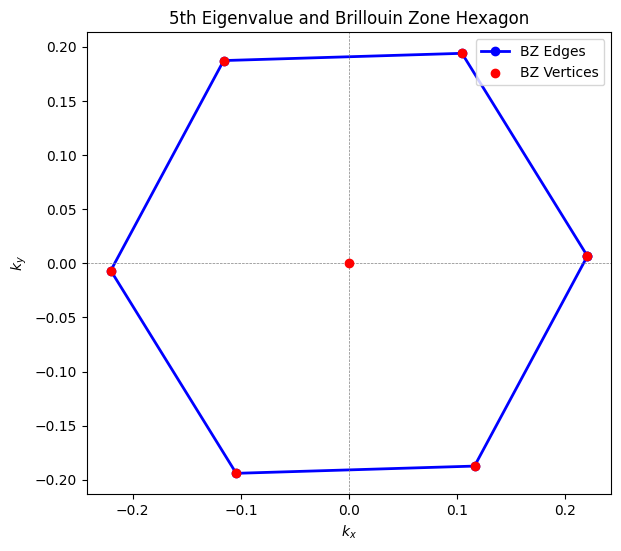

In [22]:
# Define k1 and k2 vectors
# Compute the hexagon vertices
v1 = k1 / 2
v2 = k2 / 2
v3 = (k1 + k2) / 2
v4 = -k1 / 2
v5 = -k2 / 2
v6 = -(k1 + k2) / 2
v7 = np.array([0, 0])  # Origin
# Ordering vertices to form a hexagon (closing the loop)
bz_hexagon = np.array([v1, v3, v2, v4, v6, v5, v1])
# Choose which eigenvalue index to plot
n = 5  # Change this to select a different eigenvalue

# Create a single figure and axes
plt.figure(figsize=(8, 6))

# # Plot the eigenvalue as a function of kx, ky
# pcm = plt.pcolormesh(kx_grid, ky_grid, eigenvalues[:, :, n], shading="auto", cmap="viridis")
# plt.colorbar(pcm, label=f"Eigenvalue index {n}")

# Overlay the Brillouin Zone (BZ) hexagon
plt.plot(bz_hexagon[:, 0], bz_hexagon[:, 1], 'bo-', linewidth=2, label="BZ Edges")
plt.scatter([v1[0], v2[0], v3[0], v4[0], v5[0], v6[0], v7[0]],
            [v1[1], v2[1], v3[1], v4[1], v5[1], v6[1], v7[1]],
            color='red', zorder=5, label="BZ Vertices")

# Optionally, display the k1 and k2 vectors on the same plot
#plt.plot([0, k1[0]], [0, k1[1]], 'r', linewidth=1, label="k1")
#plt.plot([0, k2[0]], [0, k2[1]], 'r', linewidth=1, label="k2")
#plt.plot([k1[0], k1[0] + k2[0]], [k1[1], k1[1] + k2[1]], 'r', linewidth=1)
#plt.plot([k2[0], k1[0] + k2[0]], [k2[1], k1[1] + k2[1]], 'r', linewidth=1)

# Add grid lines and aspect settings
plt.axhline(0, color='gray', linestyle="--", linewidth=0.5)
plt.axvline(0, color='gray', linestyle="--", linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')

# Set labels and title
plt.xlabel(r"$k_x$")
plt.ylabel(r"$k_y$")
plt.title(f"{n}th Eigenvalue and Brillouin Zone Hexagon")
plt.legend()

plt.show()


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define high-symmetry points
Gamma = np.array([0, 0])
M = np.array([k2[0] / 4, k2[1] / 4])
K = np.array([k1[0] / 2, k1[1] / 2])
k = np.array([(k1[0] + k2[0]) / 2, (k1[1] + k2[1]) / 2])  # Midpoint

# Discretize the high-symmetry path: Γ → M → K → Γ
num_k = 50  # Points per segment
k_path = np.concatenate([
    np.linspace(Gamma, k, num_k),
    np.linspace(k, M, num_k),
    np.linspace(M, K, num_k),
    np.linspace(K, Gamma, num_k)
])

# Number of total k-points
num_total_k = k_path.shape[0]


In [38]:
# Store eigenvalues
eigenvalues = []

# Loop over k-points
for k_vec in tqdm(k_path, desc="Computing band structure"):
    ham = lattice.generate_k_space_hamiltonian(k_vec, 1, 1, 0.2, 0.2, 0, 0)
    eig, _ = np.linalg.eig(ham.real)  # Compute and sort eigenvalues
    eigenvalues.append(np.sort(eig))

# Convert to NumPy array
eigenvalues = np.array(eigenvalues)  # Shape: (num_total_k, num_bands)

Computing band structure: 100%|██████████| 200/200 [02:04<00:00,  1.60it/s]


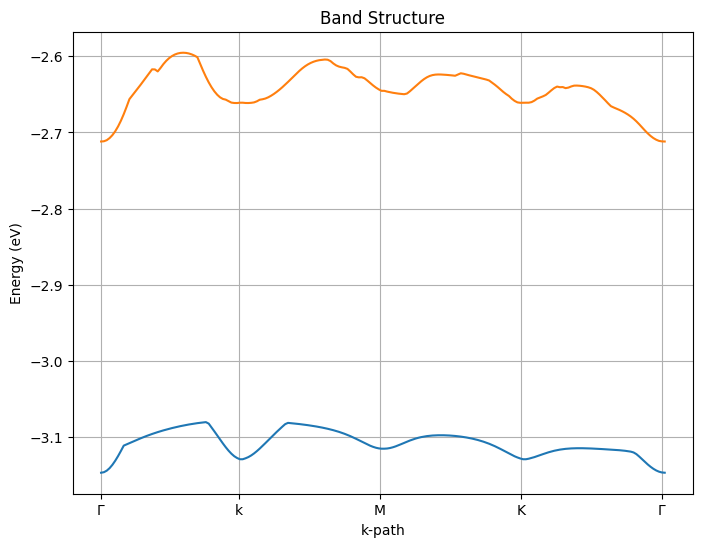

In [39]:
# Define the k-axis (distance along the path)
k_distances = np.linspace(0, num_total_k, num_total_k)

# List of band indices you want to plot (0-based)
band_indices = [0, 33 ]  # Adjust as needed]

plt.figure(figsize=(8, 6))

# Loop over the desired bands and plot each one
for band_index in band_indices:
    plt.plot(k_distances, eigenvalues[:, band_index],
             label=f"Band {band_index + 1}")

# Set high-symmetry point markers based on your k-path segmentation
xtick_positions = [0, num_k - 1, 2*num_k - 1, 3*num_k - 1, 4*num_k - 1]
xtick_labels = [r"$\Gamma$", "k", "M", "K", r"$\Gamma$"]

plt.xticks(xtick_positions, xtick_labels)
plt.ylabel("Energy (eV)")
plt.xlabel("k-path")
plt.title("Band Structure")
#plt.legend()
plt.grid(True)
plt.show()
